# Data about NFT

The dataset comes from [Kaggle](https://www.kaggle.com/)
* [nft_sales-v503](https://www.kaggle.com/hemil26/nft-collections-dataset)contains the lastest info about the NFTs in the market
* [coins_Ethereum](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory) contains the info about history of Ether price
* [NFT_Sales 2](https://www.kaggle.com/mathurinache/nft-history-sales) contains the total NFT sales in history

To download the data set, simply click "download" in the website

***


#### Questions:
1. Compare price/volume of Eth to NFT sales
2. What is the average Eth price?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading in the dataset

In [57]:
nft_df = pd.read_csv('nft_sales_v0503.csv')
eth_df = pd.read_csv('coins/coin_Ethereum.csv')
nfthis_df = pd.read_csv('NFT_Sales 2.csv')

In [58]:
eth_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


In [59]:
nfthis_df.describe()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
count,1.606000e+03,1.606000e+03,1598.000000,1.606000e+03,1605.000000,1605.000000,1.605000e+03,1605.000000,1597.000000,1605.000000
mean,5.914905e+08,3.397818e+06,155847.829161,2.218615e+06,2749.373832,98.241209,6.372813e+06,6866.409346,502.875391,4117.035514
std,1.720005e+09,2.329504e+06,136083.110285,1.432603e+06,5597.500898,179.880778,2.486102e+07,12610.348160,1363.808979,7578.887189
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1024.000000,7.140000,-6.196720e+06,-2195.000000,-573.000000,-1171.000000
25%,5.129669e+07,1.451181e+06,81998.250000,9.735630e+05,662.000000,27.110000,4.605234e+04,2274.000000,69.000000,1462.000000
50%,8.691480e+07,3.203392e+06,121914.000000,2.296888e+06,1025.000000,32.050000,8.218757e+04,3681.000000,126.000000,2358.000000
75%,1.328586e+08,4.938128e+06,180948.250000,3.150981e+06,1846.000000,71.360000,3.528744e+05,5844.000000,267.000000,3695.000000
max,1.023456e+10,1.102278e+07,803665.000000,6.609013e+06,69685.000000,928.490000,3.886364e+08,161732.000000,30129.000000,93609.000000


In [60]:
nft_df.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,157
unique,250,250,244,249,151
top,BugBears,"$12,392,176","6,960","12,174",1
freq,1,1,2,2,6


- print the array of columns and the index array
- create some simple plot of part of the data
- create a pivot table and plot some data from that pivot table
- use the groupby feature


In [61]:
nft_df.columns
eth_df.columns
nfthis_df.columns

Index(['Date', 'Sales_USD_cumsum', 'Number_of_Sales_cumsum',
       'Active_Market_Wallets_cumsum', 'Primary_Sales_cumsum',
       'Secondary_Sales_cumsum', 'AverageUSD_cum', 'Sales_USD',
       'Number_of_Sales', 'Active_Market_Wallets', 'Primary_Sales'],
      dtype='object')

### draw NFT history price

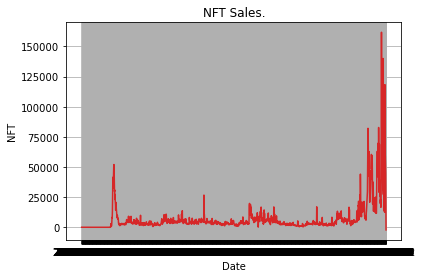

In [71]:
def plot_df(eth_df, x, y, title="", xlabel='Date', ylabel='NFT', dpi=100):
    #plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

plot_df(nfthis_df, x=nfthis_df.index, y=nfthis_df.Number_of_Sales, title='NFT Sales.') 
plt.grid()

### Draw Eth history price

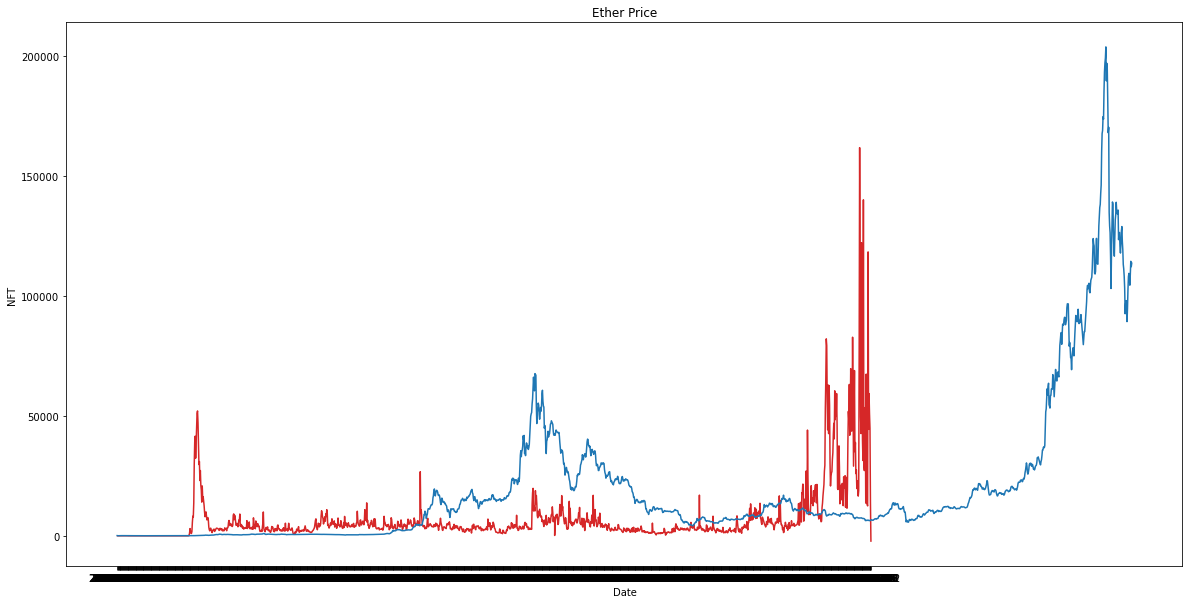

In [70]:
def plot_eth_df(eth_df, x, y, title="", xlabel='Date', ylabel='NFT', dpi=100):
 #   plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.figure(figsize=(20,10))
nfthis_df.index = nfthis_df['Date']
Price = (eth_df.High + eth_df.Low)/2*50
plot_df(nfthis_df, x=nfthis_df.index, y=nfthis_df.Number_of_Sales, title='NFT Sales.') 
plot_eth_df(eth_df, x=eth_df.index, y=Price, title='Ether Price') 
#plt.grid()

***

## The Most trending NFTs

### Bored Ape Yacht Club

<img src ="https://www.rollingstone.com/wp-content/uploads/2021/10/RS-BoardApe_Lead_5.jpg" alt = "Collections of Bored Ape Yacht Club" title = "Bored Ape Yacht Club" />

In [64]:
df2 = nft_df[nft_df["Collections"]=="Bored Ape Yacht Club"]
df2

,Collections,Sales,Buyers,Txns,Owners
2,Bored Ape Yacht Club,"$1,387,210,003","9,579","24,737","6,360"


In [80]:
pivot = eth_df.pivot_table(index =['Name', 'Symbol'], values =['Close', 'Open'], aggfunc ={'median', 'mean', 'min'})
pivot

Close                              Open              \
                       mean      median       min        mean      median   
Name     Symbol                                                             
Ethereum ETH     383.910691  198.643691  0.434829  382.879899  198.425096   

                           
                      min  
Name     Symbol            
Ethereum ETH     0.431589

This pivot table shows the medium, mean, and min of Ether closing and opening price 

In [83]:
z = nft_df.groupby("Collections")
z.groups["Bored Ape Yacht Club"]

Int64Index([2], dtype='int64')

## Analysis

The Ether price seems to have a moderate corelation with the total sales of NFT. The average Ether price is 382.879899 USD